In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pstq8sMQx5LLf0XseHSw")
project = rf.workspace("vision-1t8xz").project("modanet-maskrcnn-ivbxz")
version = project.version(1)
dataset = version.download("coco")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 36.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 93.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-sto


Extracting Dataset Version Zip to Modanet-MaskRCNN-1 in coco:: 100%|██████████| 52229/52229 [00:09<00:00, 5652.00it/s]


In [4]:
!pip install segmentation-models-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 1.6 MB/s eta 0:00:000:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: n

In [5]:
import json

# Paths
ann_file = "/kaggle/working/Modanet-MaskRCNN-1/train/_annotations.coco.json"
out_file = "/kaggle/working/Modanet-MaskRCNN-1/train/_annotations_renamed_background.coco.json" 

# Load original COCO JSON
with open(ann_file, "r") as f:
    coco_json = json.load(f)


found_fashion_and_renamed = False
for cat in coco_json["categories"]:
    if cat["name"] == "fashion":
        # Check if it's indeed ID 0 as you mentioned
        if cat["id"] == 0:
            cat["name"] = "background"
            print(f"Renamed category ID {cat['id']} from 'fashion' to 'background'.")
            found_fashion_and_renamed = True
            break # Assuming there's only one "fashion" category

if not found_fashion_and_renamed:
    print("Warning: 'fashion' category (ID 0) not found or its ID was not 0. No rename performed.")


# Save cleaned JSON
with open(out_file, "w") as f:
    json.dump(coco_json, f)

print(f"Modified JSON with 'fashion' renamed to 'background' saved to: {out_file}")

# Optional: Print categories to verify
print("\nCategories in the new cleaned JSON:")
for cat in coco_json["categories"]:
    print(f"ID {cat['id']}: {cat['name']}")


Renamed category ID 0 from 'fashion' to 'background'.
Modified JSON with 'fashion' renamed to 'background' saved to: /kaggle/working/Modanet-MaskRCNN-1/train/_annotations_renamed_background.coco.json

Categories in the new cleaned JSON:
ID 0: background
ID 1: bag
ID 2: belt
ID 3: boots
ID 4: dress
ID 5: footwear
ID 6: headwear
ID 7: outer
ID 8: pants
ID 9: scarf-tie
ID 10: shorts
ID 11: skirt
ID 12: sunglasses
ID 13: top


In [6]:
import os
import cv2
import random
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from torch.utils.data import random_split
from torch import Generator
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
import albumentations as A


In [7]:
RARE_CLASSES = ["scarf-tie", "headwear", "shorts", "boots", "sunglasses"]
class CocoSegDataset(Dataset):
    def __init__(self, ann_file, img_dir,
                 base_transform,
                 rare_transform=None,
                 rare_classes=None,
                 rare_aug_prob=0.3,
                 default_size=(128, 128)):
        self.coco = COCO(ann_file)
        self.img_dir = img_dir
        self.img_ids = self.coco.getImgIds()

        self.base_transform = base_transform
        self.rare_transform = rare_transform
        self.rare_classes = rare_classes or []
        self.rare_aug_prob = rare_aug_prob
        self.default_size = default_size

        # category mappings
        self.cat_map = {c['id']: c['name'] for c in self.coco.loadCats(self.coco.getCatIds())}

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs(img_id)[0]
        img_path = os.path.join(self.img_dir, img_info['file_name'])

        # Load image
        img = cv2.imread(img_path)
        if img is None:
            img = np.zeros((self.default_size[0], self.default_size[1], 3), dtype=np.uint8)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        height, width = img.shape[:2]

        # Initialize mask
        mask = np.zeros((height, width), dtype=np.uint8)
        classes_in_img = set()

        # Load annotations
        ann_ids = self.coco.getAnnIds(imgIds=[img_id])
        anns = self.coco.loadAnns(ann_ids)

        for ann in anns:
            cat_id = ann['category_id']
            if cat_id == 0:
                continue

            if isinstance(ann['segmentation'], list):
                rles = maskUtils.frPyObjects(ann['segmentation'], height, width)
            else:
                rles = ann['segmentation']

            decoded_mask = maskUtils.decode(rles)
            if decoded_mask.ndim == 3:
                decoded_mask = np.max(decoded_mask, axis=-1)

            mask = np.where((decoded_mask > 0) & (cat_id > mask), cat_id, mask)
            classes_in_img.add(self.cat_map[cat_id])

        # Apply rare augmentation probabilistically
        if self.rare_transform and any(c in self.rare_classes for c in classes_in_img):
            if random.random() < self.rare_aug_prob:
                transformed = self.rare_transform(image=img, mask=mask)
                img, mask = transformed['image'], transformed['mask']

        # Always apply base transform last
        transformed = self.base_transform(image=img, mask=mask)
        img, mask = transformed['image'], transformed['mask']

        # Convert to tensors
        img = torch.from_numpy(img.transpose(2, 0, 1)).float()  # HWC → CHW
        mask = torch.from_numpy(mask).long()

        return img, mask


In [8]:
train_base_transform = A.Compose([
    A.Resize(256, 256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.2, rotate_limit=20, p=0.5),
    A.Perspective(scale=(0.05, 0.1), p=0.3),
    A.RandomBrightnessContrast(p=0.3),
    A.HueSaturationValue(p=0.3),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.3),
    A.CLAHE(p=0.2),
    A.GridDistortion(p=0.2),
    A.ElasticTransform(p=0.2),
    A.MotionBlur(blur_limit=3, p=0.2),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
    A.Normalize()
])

rare_transform = A.Compose([
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.3, rotate_limit=30, p=0.5),
    A.RandomBrightnessContrast(p=0.4),
    A.MotionBlur(blur_limit=5, p=0.3),
    A.Normalize()
])

preprocess_transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize()
])


ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
Argument(s) 'var_limit' are not valid for transform GaussNoise


In [9]:
ann_file = "/kaggle/working/Modanet-MaskRCNN-1/train/_annotations_renamed_background.coco.json"
img_dir = "/kaggle/working/Modanet-MaskRCNN-1/train"

full_dataset_train = CocoSegDataset(
    ann_file=ann_file,
    img_dir=img_dir,
    base_transform=train_base_transform,
    rare_transform=rare_transform,
    rare_classes=RARE_CLASSES,
    rare_aug_prob=0.3
)

full_dataset_val = CocoSegDataset(
    ann_file=ann_file,
    img_dir=img_dir,
    base_transform=preprocess_transform
)

full_dataset_test = CocoSegDataset(
    ann_file=ann_file,
    img_dir=img_dir,
    base_transform=preprocess_transform
)


loading annotations into memory...
Done (t=4.54s)
creating index...
index created!
loading annotations into memory...
Done (t=3.80s)
creating index...
index created!
loading annotations into memory...
Done (t=3.99s)
creating index...
index created!


In [10]:
total_len = len(full_dataset_train)
train_len = int(0.6 * total_len)
val_len = int(0.25 * total_len)
test_len = total_len - train_len - val_len

g = torch.Generator().manual_seed(42)
indices = torch.randperm(total_len, generator=g)

train_indices = indices[:train_len]
val_indices = indices[train_len:train_len + val_len]
test_indices = indices[train_len + val_len:]

train_dataset = Subset(full_dataset_train, train_indices)
val_dataset = Subset(full_dataset_val, val_indices)
test_dataset = Subset(full_dataset_test, test_indices)

print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")


Train: 31335, Val: 13056, Test: 7834


In [12]:
batch_size = 16
num_workers = 4
pin_memory = True

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, pin_memory=pin_memory)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                        num_workers=num_workers, pin_memory=pin_memory)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                         num_workers=num_workers, pin_memory=pin_memory)


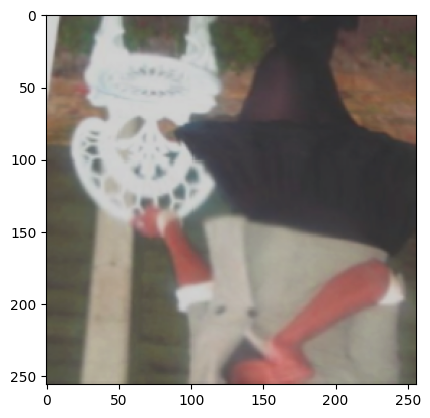

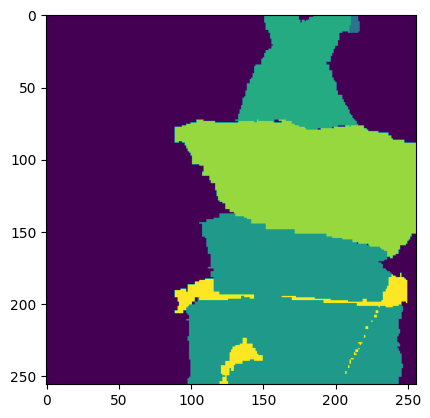

In [13]:
import matplotlib.pyplot as plt

def denormalize(img_tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
    img = img_tensor * std + mean
    return img.clamp(0,1)

# Example: show one batch
imgs, masks = next(iter(train_loader))
img = denormalize(imgs[0]).permute(1,2,0).cpu().numpy()

plt.imshow(img)
plt.show()
plt.imshow(masks[0].cpu().numpy())
plt.show()


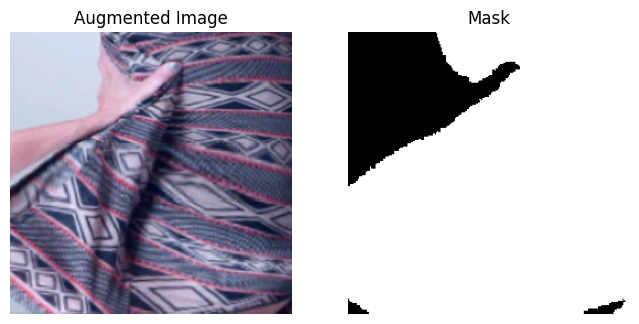

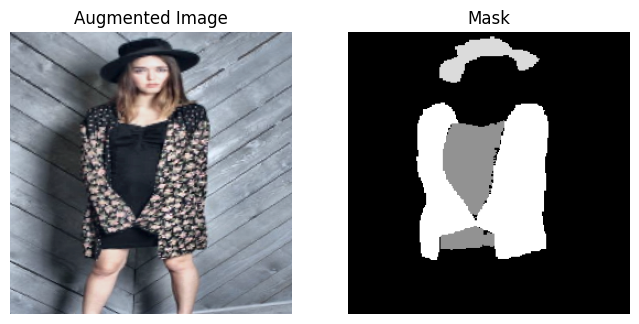

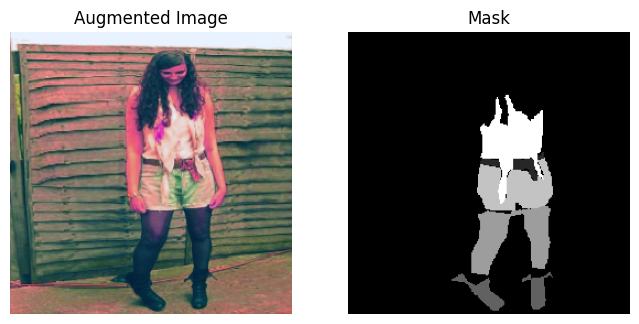

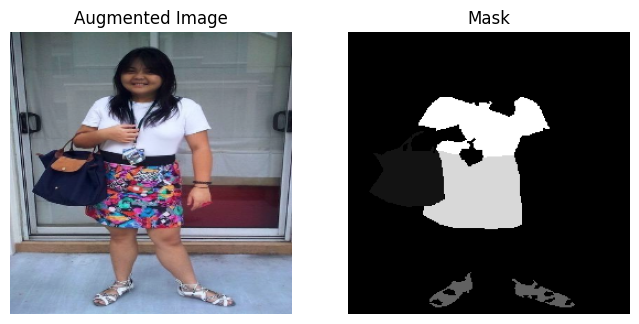

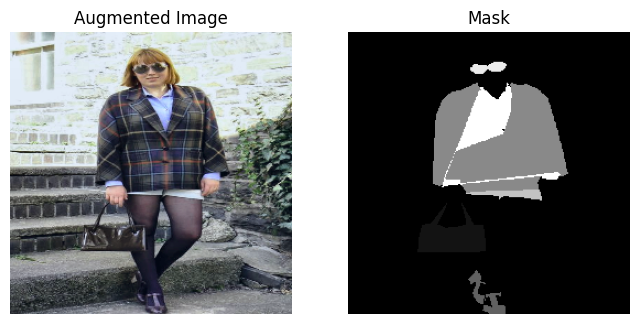

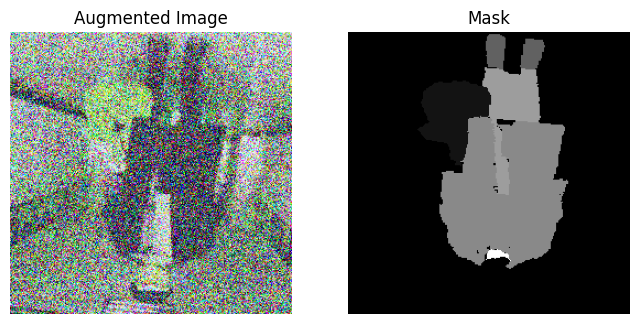

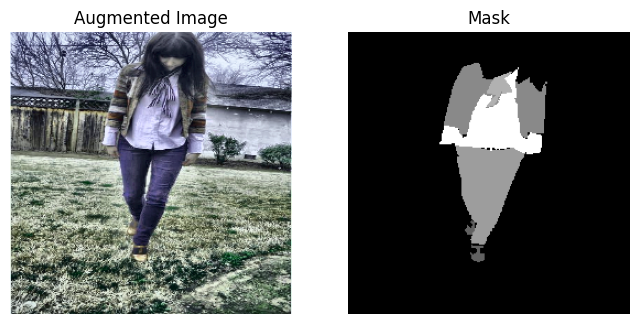

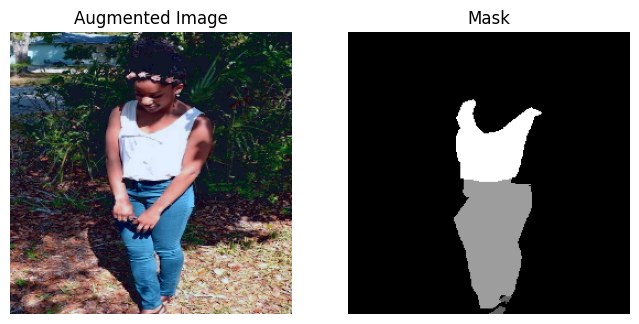

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def show_batch(loader, num_samples=8):
    # take one batch
    images, masks = next(iter(loader))

    # move to CPU if on GPU
    images = images.cpu()
    masks = masks.cpu()

    for i in range(num_samples):
        img = images[i].permute(1, 2, 0).numpy()  # C,H,W → H,W,C
        img = (img - img.min()) / (img.max() - img.min() + 1e-8)  # normalize to [0,1]

        mask = masks[i].squeeze().numpy()

        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        plt.imshow(img)
        plt.title("Augmented Image")
        plt.axis("off")

        plt.subplot(1,2,2)
        plt.imshow(mask, cmap="gray")
        plt.title("Mask")
        plt.axis("off")

        plt.show()


show_batch(train_loader, num_samples=8)


In [16]:
import torch
from torch.utils.data import DataLoader

num_classes = 14  # number of classes
pixel_counts = torch.zeros(num_classes, device="cuda", dtype=torch.int64)

loader = DataLoader(train_dataset, batch_size=1, shuffle=False)

for imgs, masks in loader:
    # Move mask to GPU
    mask = masks[0].to("cuda")  # [H, W]
    
    # Count pixels for each class
    for c in range(num_classes):
        pixel_counts[c] += torch.sum(mask == c)

print("Pixel counts per class:", pixel_counts.cpu().numpy())



Pixel counts per class: [1668845858   20398464    1492476    5978239   66628661   11843617
    2436203   83886731   57593411    5988505    8787098   38710821
    1025325   79955151]


In [13]:
import numpy as np
import torch

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# if isinstance(pixel_counts, torch.Tensor):
#     pixel_counts = pixel_counts.detach().cpu().numpy()

# Pixel counts per class
pixel_counts = np.array([
    1668845858, 20398464, 1492476, 5978239, 66628661, 11843617,
    2436203, 83886731, 57593411, 5988505, 8787098, 38710821,
    1025325, 79955151
], dtype=np.float64)

# Avoid division by zero
pixel_counts = pixel_counts + 1e-6

# Inverse frequency
class_weights = 1.0 / pixel_counts

# Normalize weights so mean = 1
class_weights = class_weights / np.mean(class_weights)

# Convert to torch tensor and keep on CPU
class_weights = torch.tensor(class_weights, dtype=torch.float32)

print("Class weights (CPU):", class_weights)


Class weights (CPU): tensor([3.0836e-03, 2.5227e-01, 3.4480e+00, 8.6079e-01, 7.7234e-02, 4.3450e-01,
        2.1123e+00, 6.1345e-02, 8.9351e-02, 8.5931e-01, 5.8563e-01, 1.3293e-01,
        5.0189e+00, 6.4361e-02])


In [14]:
# Define your class mapping
class_names = [
    "background", "bag", "belt", "boots", "dress", "footwear", "headwear",
    "outer", "pants", "scarf-tie", "shorts", "skirt", "sunglasses", "top"
]

# Print the class weights
for cat_id, class_name in enumerate(class_names):
    print(f"Class: {class_name} (ID {cat_id}) -> Weight: {class_weights[cat_id].item():.4f}")


Class: background (ID 0) -> Weight: 0.0031
Class: bag (ID 1) -> Weight: 0.2523
Class: belt (ID 2) -> Weight: 3.4480
Class: boots (ID 3) -> Weight: 0.8608
Class: dress (ID 4) -> Weight: 0.0772
Class: footwear (ID 5) -> Weight: 0.4345
Class: headwear (ID 6) -> Weight: 2.1123
Class: outer (ID 7) -> Weight: 0.0613
Class: pants (ID 8) -> Weight: 0.0894
Class: scarf-tie (ID 9) -> Weight: 0.8593
Class: shorts (ID 10) -> Weight: 0.5856
Class: skirt (ID 11) -> Weight: 0.1329
Class: sunglasses (ID 12) -> Weight: 5.0189
Class: top (ID 13) -> Weight: 0.0644


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, random_split


In [18]:

import torch
import segmentation_models_pytorch as smp

num_classes = 14

# Define U-Net model
model = smp.Unet(
    encoder_name="resnet34",        # encoder backbone
    encoder_weights="imagenet",     # pretrained on ImageNet
    in_channels=3,                  # RGB images
    classes=num_classes             # output channels = num classes
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)



config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

In [19]:
import torch.optim as optim

# Example optimizer using Adam
optimizer = optim.AdamW(
    model.parameters(),  # all trainable parameters of the model
    lr=1e-4,             # learning rate (tune this)
    weight_decay=1e-5    # L2 regularization (optional, prevents overfitting)
)

# Optional: Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.5,        # Reduce LR by this factor
    patience=2,        # Wait this many epochs without improvement
    verbose=True
)


The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

# -----------------------------
# Weighted Dice Loss
# -----------------------------
class WeightedDiceLoss(nn.Module):
    def __init__(self, smooth=1e-6, class_weights=None):
        super(WeightedDiceLoss, self).__init__()
        self.smooth = smooth
        self.class_weights = class_weights

    def forward(self, preds, targets):
        num_classes = preds.shape[1]
        preds = F.softmax(preds, dim=1)
        targets_onehot = F.one_hot(targets, num_classes=num_classes).permute(0, 3, 1, 2).float()

        dice_per_class = []
        for c in range(num_classes):
            pred_c = preds[:, c, :, :]
            target_c = targets_onehot[:, c, :, :]

            intersection = (pred_c * target_c).sum()
            union = pred_c.sum() + target_c.sum()
            dice_c = (2. * intersection + self.smooth) / (union + self.smooth)
            dice_per_class.append(dice_c)

        dice_scores_tensor = torch.stack(dice_per_class)
        dice_losses_per_class = 1.0 - dice_scores_tensor

        if self.class_weights is not None:
            weights = self.class_weights.to(preds.device)
            weighted_dice_losses = dice_losses_per_class * weights[:num_classes]
            return torch.sum(weighted_dice_losses) / torch.sum(weights[:num_classes])
        else:
            return torch.mean(dice_losses_per_class)

# -----------------------------
# Focal Loss
# -----------------------------
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, weight=None):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.weight = weight

    def forward(self, preds, targets):
        ce_loss = F.cross_entropy(preds, targets, reduction='none', weight=self.weight)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean()

# -----------------------------
# Lovasz loss helper functions
# -----------------------------
def lovasz_grad(gt_sorted):
    gts = gt_sorted.sum()
    intersection = gts - gt_sorted.cumsum(0)
    union = gts + (1 - gt_sorted).cumsum(0)
    jaccard = 1. - intersection / union
    if gt_sorted.numel() > 0:
        jaccard[1:] = jaccard[1:] - jaccard[:-1]
    return jaccard

def lovasz_softmax(probs, labels, classes='present'):
    losses = []
    num_classes = probs.shape[1]
    for c in range(num_classes):
        fg = (labels == c).float()
        if classes == 'present' and fg.sum() == 0:
            continue
        class_pred = probs[:, c, :, :].contiguous().view(-1)
        class_gt = fg.view(-1)
        errors = (class_gt - class_pred).abs()
        errors_sorted, perm = torch.sort(errors, descending=True)
        gt_sorted = class_gt[perm]
        grad = lovasz_grad(gt_sorted)
        losses.append(torch.dot(errors_sorted, grad))
    return torch.mean(torch.stack(losses)) if losses else torch.tensor(0., device=probs.device)

# -----------------------------
# Combined Loss
# -----------------------------
class CombinedLoss(nn.Module):
    def __init__(self, class_weights=None,
                 ce_weight=1.0, dice_weight=1.0,
                 focal_weight=1.0, lovasz_weight=1.0,
                 use_lovasz=True):
        super(CombinedLoss, self).__init__()
        self.ce = nn.CrossEntropyLoss(weight=class_weights)
        self.dice = WeightedDiceLoss(class_weights=class_weights)
        self.focal = FocalLoss(weight=class_weights)
        self.ce_weight = ce_weight
        self.dice_weight = dice_weight
        self.focal_weight = focal_weight
        self.lovasz_weight = lovasz_weight
        self.use_lovasz = use_lovasz

    def forward(self, preds, targets):
        ce_loss = self.ce(preds, targets)
        dice_loss = self.dice(preds, targets)
        focal_loss = self.focal(preds, targets)

        total_loss = (self.ce_weight * ce_loss +
                      self.dice_weight * dice_loss +
                      self.focal_weight * focal_loss)

        if self.use_lovasz:
            probs = F.softmax(preds, dim=1)
            lovasz_loss = lovasz_softmax(probs, targets)
            total_loss += self.lovasz_weight * lovasz_loss

        return total_loss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move class_weights to device
class_weights = class_weights.to(device)

criterion = CombinedLoss(class_weights=class_weights).to(device)

num_epochs = 35
best_val_loss = float('inf')
bad_epochs = 0
patience = 3

# Assume model, optimizer, scheduler, train_loader, val_loader, device, class_weights are defined
criterion = CombinedLoss(class_weights=class_weights).to(device)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", unit="batch")

    for imgs, masks in loop:
        imgs, masks = imgs.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)

        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        loop.set_postfix(loss=train_loss / (loop.n + 1))

    train_loss /= len(train_loader)

    # Validation
    model.eval()
    val_loss = 0.0
    loop_val = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", unit="batch")
    with torch.no_grad():
        for imgs, masks in loop_val:
            imgs, masks = imgs.to(device), masks.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, masks)
            val_loss += loss.item()
            loop_val.set_postfix(loss=val_loss / (loop_val.n + 1))

    val_loss /= len(val_loader)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # Scheduler & Early Stopping
    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        bad_epochs = 0
        torch.save(model.state_dict(), "/kaggle/working/Last_try_Fixed_Model.pth")
        print("Validation improved, model saved.")
    else:
        bad_epochs += 1
        print(f"No improvement for {bad_epochs} epoch(s).")
        if bad_epochs >= patience:
            print("Early stopping triggered!")
            break


Epoch 1/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.08batch/s, loss=2.49]


Epoch 1/35 | Train Loss: 3.3634 | Val Loss: 2.4883
Validation improved, model saved.


Epoch 2/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.27batch/s, loss=2.29]


Epoch 2/35 | Train Loss: 2.9051 | Val Loss: 2.2860
Validation improved, model saved.


Epoch 3/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.31batch/s, loss=2.13]


Epoch 3/35 | Train Loss: 2.7180 | Val Loss: 2.1308
Validation improved, model saved.


Epoch 4/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.23batch/s, loss=2.05]


Epoch 4/35 | Train Loss: 2.6164 | Val Loss: 2.0528
Validation improved, model saved.


Epoch 5/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.26batch/s, loss=2.04]


Epoch 5/35 | Train Loss: 2.5322 | Val Loss: 2.0412
Validation improved, model saved.


Epoch 6/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.26batch/s, loss=2.01]


Epoch 6/35 | Train Loss: 2.4876 | Val Loss: 2.0088
Validation improved, model saved.


Epoch 7/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.31batch/s, loss=1.89]


Epoch 7/35 | Train Loss: 2.4330 | Val Loss: 1.8883
Validation improved, model saved.


Epoch 8/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.10batch/s, loss=1.9] 


Epoch 8/35 | Train Loss: 2.3868 | Val Loss: 1.8973
No improvement for 1 epoch(s).


Epoch 9/35 [Val]: 100%|██████████| 816/816 [00:56<00:00, 14.39batch/s, loss=1.85]


Epoch 9/35 | Train Loss: 2.3642 | Val Loss: 1.8460
Validation improved, model saved.


Epoch 10/35 [Val]: 100%|██████████| 816/816 [00:56<00:00, 14.33batch/s, loss=1.85]


Epoch 10/35 | Train Loss: 2.3246 | Val Loss: 1.8480
No improvement for 1 epoch(s).


Epoch 11/35 [Val]: 100%|██████████| 816/816 [00:56<00:00, 14.35batch/s, loss=1.83]


Epoch 11/35 | Train Loss: 2.3090 | Val Loss: 1.8266
Validation improved, model saved.


Epoch 12/35 [Val]: 100%|██████████| 816/816 [00:56<00:00, 14.33batch/s, loss=1.78]


Epoch 12/35 | Train Loss: 2.2884 | Val Loss: 1.7825
Validation improved, model saved.


Epoch 13/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.32batch/s, loss=1.83]


Epoch 13/35 | Train Loss: 2.2629 | Val Loss: 1.8329
No improvement for 1 epoch(s).


Epoch 14/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.28batch/s, loss=1.77]


Epoch 14/35 | Train Loss: 2.2539 | Val Loss: 1.7657
Validation improved, model saved.


Epoch 15/35 [Val]: 100%|██████████| 816/816 [00:59<00:00, 13.67batch/s, loss=1.78]


Epoch 15/35 | Train Loss: 2.2260 | Val Loss: 1.7808
No improvement for 1 epoch(s).


Epoch 16/35 [Val]: 100%|██████████| 816/816 [00:58<00:00, 13.90batch/s, loss=1.76]


Epoch 16/35 | Train Loss: 2.2013 | Val Loss: 1.7551
Validation improved, model saved.


Epoch 17/35 [Val]: 100%|██████████| 816/816 [01:00<00:00, 13.47batch/s, loss=1.76]


Epoch 17/35 | Train Loss: 2.1953 | Val Loss: 1.7567
No improvement for 1 epoch(s).


Epoch 18/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.13batch/s, loss=1.74]


Epoch 18/35 | Train Loss: 2.1802 | Val Loss: 1.7368
Validation improved, model saved.


Epoch 19/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.12batch/s, loss=1.72]


Epoch 19/35 | Train Loss: 2.1664 | Val Loss: 1.7232
Validation improved, model saved.


Epoch 20/35 [Val]: 100%|██████████| 816/816 [00:58<00:00, 14.04batch/s, loss=1.71]


Epoch 20/35 | Train Loss: 2.1436 | Val Loss: 1.7101
Validation improved, model saved.


Epoch 21/35 [Val]: 100%|██████████| 816/816 [00:58<00:00, 14.06batch/s, loss=1.73]


Epoch 21/35 | Train Loss: 2.1409 | Val Loss: 1.7287
No improvement for 1 epoch(s).


Epoch 22/35 [Val]: 100%|██████████| 816/816 [00:56<00:00, 14.38batch/s, loss=1.71]


Epoch 22/35 | Train Loss: 2.1371 | Val Loss: 1.7112
No improvement for 2 epoch(s).


Epoch 23/35 [Val]: 100%|██████████| 816/816 [00:59<00:00, 13.67batch/s, loss=1.68]


Epoch 23/35 | Train Loss: 2.1121 | Val Loss: 1.6827
Validation improved, model saved.


Epoch 24/35 [Val]: 100%|██████████| 816/816 [00:59<00:00, 13.66batch/s, loss=1.68]


Epoch 24/35 | Train Loss: 2.1019 | Val Loss: 1.6841
No improvement for 1 epoch(s).


Epoch 25/35 [Val]: 100%|██████████| 816/816 [00:58<00:00, 13.96batch/s, loss=1.69]


Epoch 25/35 | Train Loss: 2.1077 | Val Loss: 1.6857
No improvement for 2 epoch(s).


Epoch 26/35 [Val]: 100%|██████████| 816/816 [00:58<00:00, 13.89batch/s, loss=1.68]


Epoch 26/35 | Train Loss: 2.0797 | Val Loss: 1.6807
Validation improved, model saved.


Epoch 27/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.07batch/s, loss=1.68]


Epoch 27/35 | Train Loss: 2.0773 | Val Loss: 1.6814
No improvement for 1 epoch(s).


Epoch 28/35 [Val]: 100%|██████████| 816/816 [00:56<00:00, 14.33batch/s, loss=1.68]


Epoch 28/35 | Train Loss: 2.0724 | Val Loss: 1.6772
Validation improved, model saved.


Epoch 29/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.27batch/s, loss=1.75]


Epoch 29/35 | Train Loss: 2.0469 | Val Loss: 1.7458
No improvement for 1 epoch(s).


Epoch 30/35 [Val]: 100%|██████████| 816/816 [00:56<00:00, 14.38batch/s, loss=1.68]


Epoch 30/35 | Train Loss: 2.0435 | Val Loss: 1.6777
No improvement for 2 epoch(s).


Epoch 31/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.22batch/s, loss=1.66]


Epoch 31/35 | Train Loss: 2.0337 | Val Loss: 1.6646
Validation improved, model saved.


Epoch 32/35 [Val]: 100%|██████████| 816/816 [00:58<00:00, 13.96batch/s, loss=1.69]


Epoch 32/35 | Train Loss: 2.0374 | Val Loss: 1.6940
No improvement for 1 epoch(s).


Epoch 33/35 [Val]: 100%|██████████| 816/816 [00:58<00:00, 14.05batch/s, loss=1.64]


Epoch 33/35 | Train Loss: 2.0255 | Val Loss: 1.6410
Validation improved, model saved.


Epoch 34/35 [Val]: 100%|██████████| 816/816 [00:57<00:00, 14.15batch/s, loss=1.67]


Epoch 34/35 | Train Loss: 2.0190 | Val Loss: 1.6665
No improvement for 1 epoch(s).


Epoch 35/35 [Train]:  55%|█████▌    | 1085/1959 [03:04<02:28,  5.88batch/s, loss=2.01]

In [22]:
import torch
import segmentation_models_pytorch as smp

num_classes = 14

model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=num_classes
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


state_dict = torch.load("/kaggle/input/model-fixed-34/Last_try_Fixed_Model (2).pth", map_location=device)
model.load_state_dict(state_dict)


model.eval()


Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [23]:
import torch, gc
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import IPython.display as display


def clear_memory():
    """Force clear GPU + CPU memory."""
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.ipc_collect()
    gc.collect()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 13
class_names = [
     "bag", "belt", "boots", "dress", "footwear",
    "headwear", "outer", "pants", "scarf-tie", "shorts",
    "skirt", "sunglasses", "top"
]

conf_mat = np.zeros((num_classes, num_classes), dtype=np.int64)

model.to(device)
model.eval()


batch_counter = 0

with torch.no_grad():
    loop = tqdm(test_loader, desc="Testing", unit="batch")
    for imgs, masks in loop:
        imgs = imgs.to(device, dtype=torch.float)
        masks = masks.to(device, dtype=torch.long)

        with torch.cuda.amp.autocast():
            outputs = model(imgs)
            preds = torch.argmax(outputs, dim=1)

        # Flatten predictions & labels
        preds_np = preds.cpu().numpy().ravel()
        masks_np = masks.cpu().numpy().ravel()

        # Update confusion matrix
        conf_mat += confusion_matrix(masks_np, preds_np, labels=range(num_classes))

        # Free memory
        del preds, outputs, imgs, masks, preds_np, masks_np

        batch_counter += 1
        if batch_counter % 30 == 0:
            clear_memory()
            loop.set_postfix_str(f"Memory cleaned at batch {batch_counter}")


clear_memory()


precision = np.diag(conf_mat) / (conf_mat.sum(axis=0) + 1e-8)
recall    = np.diag(conf_mat) / (conf_mat.sum(axis=1) + 1e-8)
f1        = 2 * precision * recall / (precision + recall + 1e-8)
iou       = np.diag(conf_mat) / (conf_mat.sum(axis=1) + conf_mat.sum(axis=0) - np.diag(conf_mat) + 1e-8)
support   = conf_mat.sum(axis=1)

# ----------------------------
# 5. Build results table
# ----------------------------
results = pd.DataFrame({
    "Class": class_names,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "IoU": iou,
    "Support": support
})

# Macro averages
macro_avg = results[["Precision", "Recall", "F1-Score", "IoU"]].mean().to_dict()
macro_row = pd.DataFrame([{
    "Class": "Macro Avg",
    **macro_avg,
    "Support": support.sum()
}])

results = pd.concat([results, macro_row], ignore_index=True)

# ----------------------------
# 6. Show results
# ----------------------------
display.display(results.round(4))


Testing: 100%|██████████| 490/490 [01:55<00:00,  4.24batch/s, Memory cleaned at batch 480]


Class  Precision  Recall  F1-Score     IoU    Support
0          bag     0.9975  0.9482    0.9722  0.9459  423879700
1         belt     0.4698  0.8768    0.6118  0.4407    4600335
2        boots     0.2273  0.7859    0.3527  0.2141     314170
3        dress     0.4671  0.7641    0.5798  0.4083    1632198
4     footwear     0.7108  0.7992    0.7524  0.6031   13730768
5     headwear     0.4528  0.8796    0.5979  0.4264    3455955
6        outer     0.3482  0.8799    0.4989  0.3324     633263
7        pants     0.6610  0.7894    0.7195  0.5619   16798596
8    scarf-tie     0.7691  0.8828    0.8221  0.6979   13124271
9       shorts     0.2670  0.7021    0.3868  0.2398    1342276
10       skirt     0.6215  0.8284    0.7102  0.5506    1950831
11  sunglasses     0.7326  0.8236    0.7754  0.6332    8831439
12         top     0.6738  0.8571    0.7545  0.6057     245517
13   Macro Avg     0.5691  0.8321    0.6565  0.5123  490539319

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


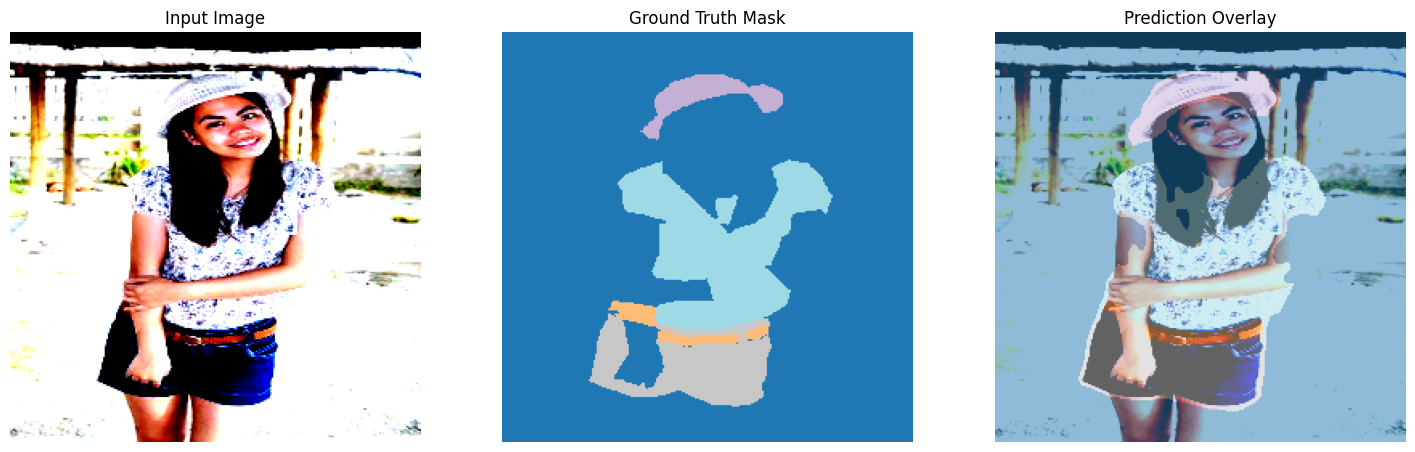

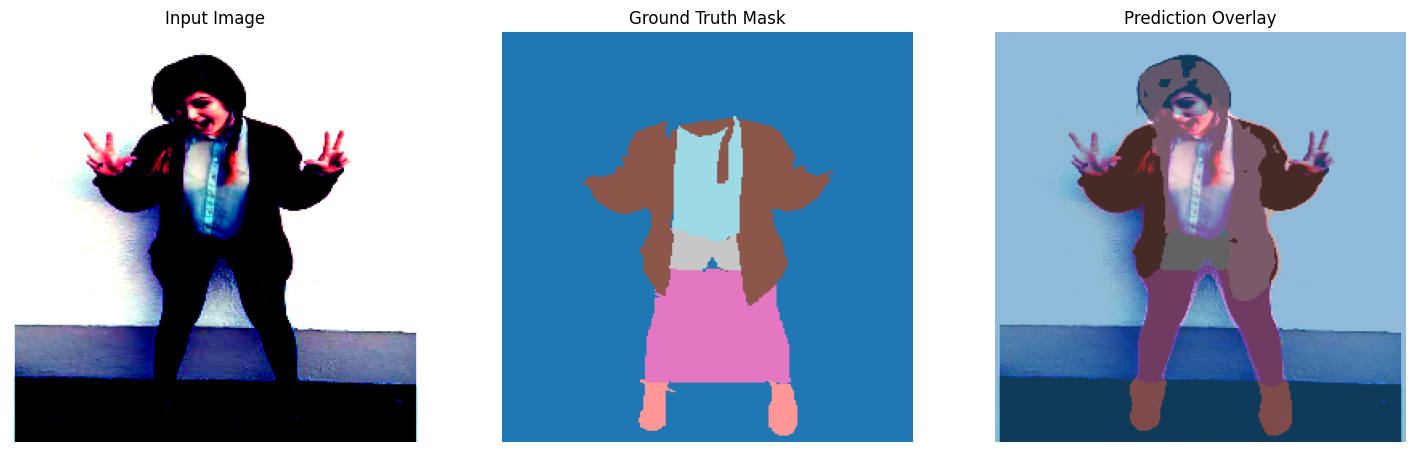

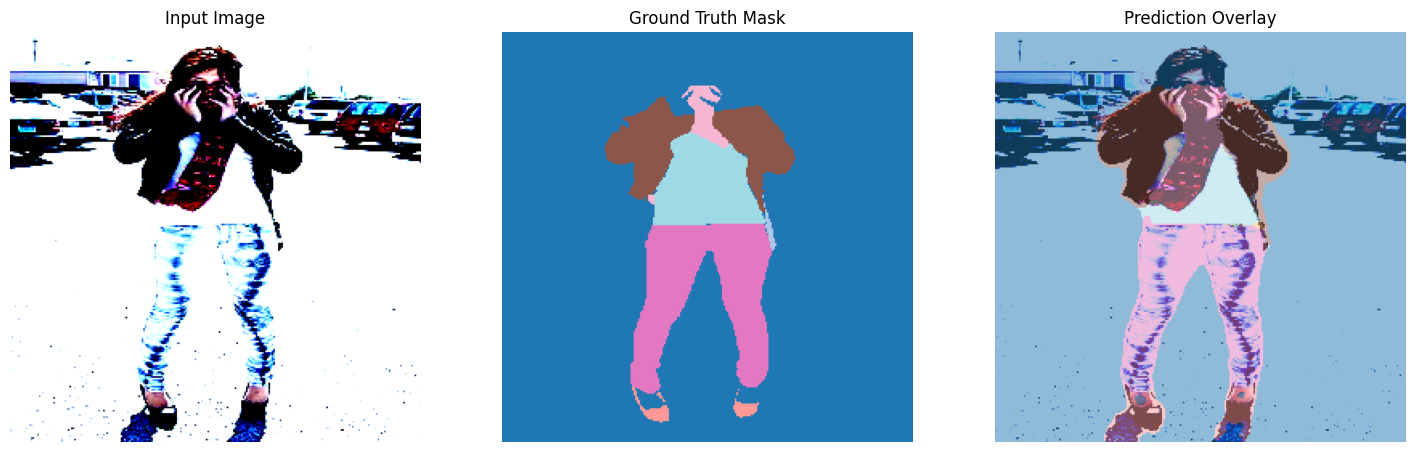

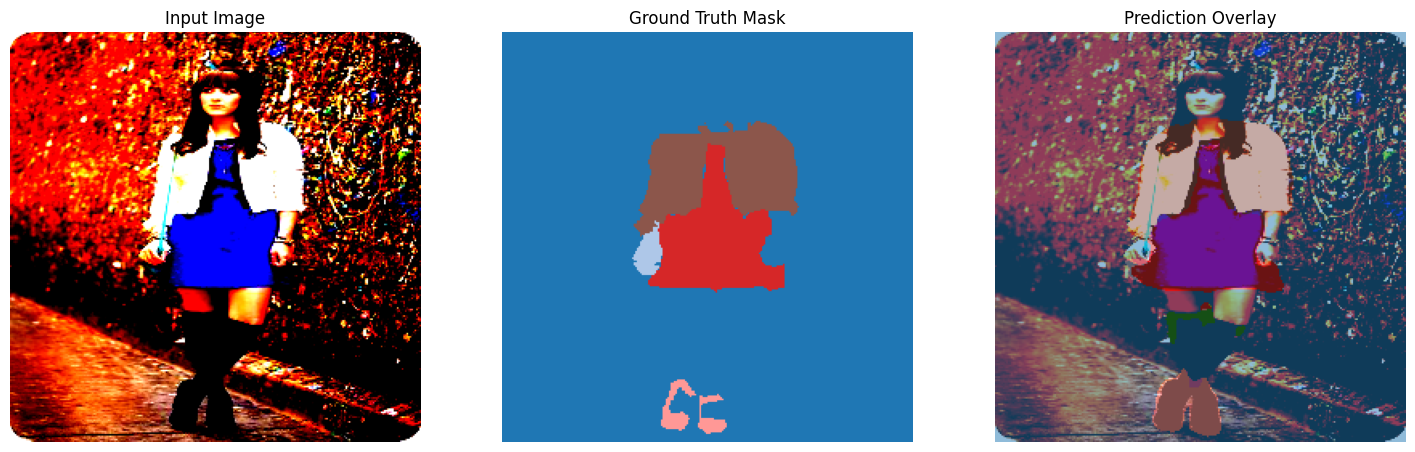

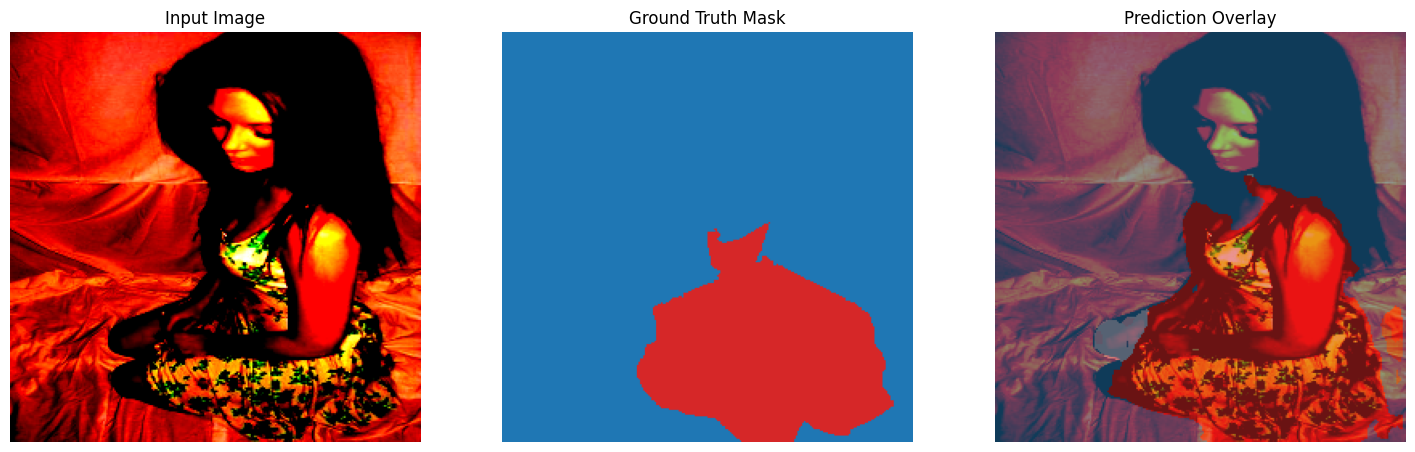

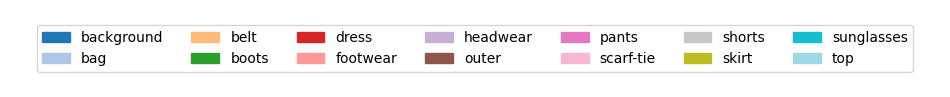

In [24]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# =============================
# 1. Generate Distinct Colors
# =============================
def generate_colors(num_classes):
    cmap = plt.get_cmap("tab20", num_classes)
    return (cmap(np.arange(num_classes))[:, :3] * 255).astype(np.uint8)

# =============================
# 2. Decode mask into color map
# =============================
def decode_segmap(mask, class_colors):
    return class_colors[mask]

# =============================
# 3. Show predictions
# =============================
def show_predictions(model, test_loader, class_names, num_samples=3, device="cuda"):
    model.eval()

    imgs, masks = next(iter(test_loader))  # one batch
    imgs, masks = imgs.to(device), masks.to(device)

    num_classes = len(class_names)
    class_colors = generate_colors(num_classes)

    with torch.no_grad(), torch.cuda.amp.autocast():
        outputs = model(imgs)
        preds = torch.argmax(outputs, dim=1)

    for i in range(min(num_samples, imgs.size(0))):
        img = imgs[i].permute(1, 2, 0).cpu().numpy()
        mask_true = decode_segmap(masks[i].cpu().numpy(), class_colors)
        mask_pred = decode_segmap(preds[i].cpu().numpy(), class_colors)

        fig, axs = plt.subplots(1, 3, figsize=(18, 6))

        axs[0].imshow(img)
        axs[0].set_title("Input Image")
        axs[0].axis("off")

        axs[1].imshow(mask_true)
        axs[1].set_title("Ground Truth Mask")
        axs[1].axis("off")

        axs[2].imshow(img)
        axs[2].imshow(mask_pred, alpha=0.5)
        axs[2].set_title("Prediction Overlay")
        axs[2].axis("off")

        plt.show()

    # =============================
    # 4. Legend (category names)
    # =============================
    legend_colors = [tuple(c/255.0 for c in class_colors[i]) for i in range(num_classes)]
    fig, ax = plt.subplots(figsize=(12, 1))
    handles = [plt.Rectangle((0,0),1,1, color=legend_colors[i]) for i in range(num_classes)]
    ax.legend(handles, class_names, loc="center", ncol=min(num_classes, 7))
    ax.axis("off")
    plt.show()


# =============================
# Example usage
# =============================

class_names = [
    "background", "bag", "belt", "boots", "dress", "footwear", "headwear",
    "outer", "pants", "scarf-tie", "shorts", "skirt", "sunglasses", "top"
]

show_predictions(model, test_loader, class_names=class_names, num_samples=5, device=device)